In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
plt.rcParams['figure.figsize'] = (15, 12)
import seaborn as sns
sns.set_theme(style="whitegrid")

In [14]:
df = pd.read_csv('afg.csv', parse_dates = [4])
df.head().T

,0,1,2,3,4
data_id,7791156,7791158,7791169,7791170,7791196
iso,4,4,4,4,4
event_id_cnty,AFG52874,AFG52889,AFG52867,AFG52888,AFG52887
event_id_no_cnty,52874,52889,52867,52888,52887
event_date,2021-04-02 00:00:00,2021-04-02 00:00:00,2021-04-02 00:00:00,2021-04-02 00:00:00,2021-04-02 00:00:00
year,2021,2021,2021,2021,2021
time_precision,2,2,2,2,2
event_type,Strategic developments,Explosions/Remote violence,Strategic developments,Battles,Explosions/Remote violence
sub_event_type,Looting/property destruction,Remote explosive/landmine/IED,Change to group/activity,Armed clash,Remote explosive/landmine/IED
actor1,Military Forces of Afghanistan (2014-),Taliban,Military Forces of Afghanistan (2014-),Taliban,Taliban


<AxesSubplot:xlabel='event_date'>

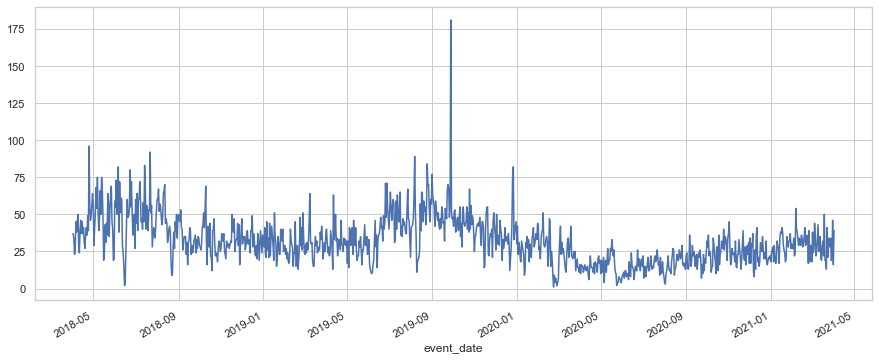

In [17]:
df.groupby('event_date').count().data_id.plot()

In [59]:
top_5 = df.groupby('event_date').count().sort_values('data_id', ascending = False).head().index

DatetimeIndex(['2019-09-28', '2018-04-25', '2018-07-22', '2019-08-07',
               '2019-08-25'],
              dtype='datetime64[ns]', name='event_date', freq=None)

In [ ]:
df[top_5]

Text(0, 0.5, '')

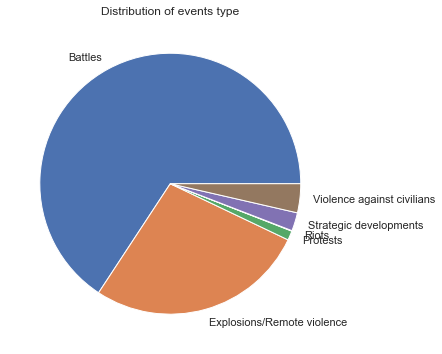

In [29]:
df.groupby('event_type').count().data_id.plot(kind= 'pie')
plt.title('Distribution of events type')
plt.ylabel('')

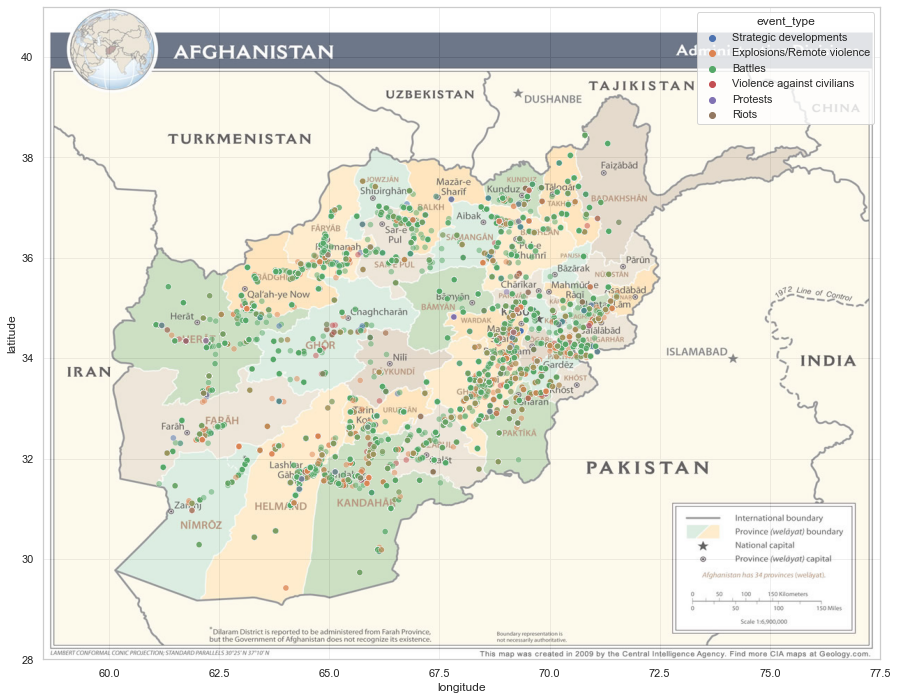

In [81]:

import matplotlib.image as mpimg 
map_img = mpimg.imread('afghanistan.jpg')
fig, ax = plt.subplots()
hmax = sns.scatterplot(x='longitude', y='latitude', data=df, hue='event_type', alpha = 0.5, zorder = 2, ax = ax)
ax.set_xlim(58.5,77.5)
ax.set_ylim(28,41)

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(), alpha = 0.7,
          zorder = 1) #put the map under the heatmap